## Libraries

In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mpl_dates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

## Excel File into the variable 'data'

In [635]:
data = pd.read_excel("Medialab Placement Data Science Test 2021 - external.xlsx",sheet_name = None)

## Checking Data Infos

In [636]:
data.keys()

odict_keys(['Brief', 'Dictionary', 'Calls', 'Quotes', 'Sales', 'Model Data'])

In [637]:
for d in data.keys():
    #print(data[d].columns)
    print(d)
    print(data[d].dtypes)
    print()

Brief
Series([], dtype: object)

Dictionary
Unnamed: 0    float64
Unnamed: 1     object
Unnamed: 2     object
dtype: object

Calls
Scheme      object
Weekday     object
Day          int64
Month        int64
Year         int64
Calls      float64
dtype: object

Quotes
Date            datetime64[ns]
Scheme                  object
Sales Quotes             int64
Spend                  float64
dtype: object

Sales
Date      datetime64[ns]
Scheme            object
Sales              int64
dtype: object

Model Data
Date                           datetime64[ns]
Conversions                           float64
TV Brand Impacts                      float64
TV Impacts                            float64
Facebook Impressions                  float64
Door Drop Volumes                     float64
Insert Volumes                        float64
Video On Demand Impressions           float64
Display Impressions                   float64
2020 Flag                               int64
Bank Holiday flag          

# Section 1

# Section 1a : On Calls, create a date columns

In [638]:
df_calls = data['Calls']
df_calls["Date"] = [f"{a}-{b}-{c}" for a,b,c in zip(df_calls["Day"],df_calls["Month"],df_calls["Year"])]
df_calls['Date'] = pd.to_datetime(df_calls['Date'], format='%d-%m-%Y')
print(df_calls.head())
df_calls.dtypes

  Scheme Weekday  Day  Month  Year  Calls       Date
0    CHD     Tue    2      1  2018    1.0 2018-01-02
1    CHD     Tue    2      1  2018    1.0 2018-01-02
2    PQU     Tue    2      1  2018    1.0 2018-01-02
3    CHD     Tue    2      1  2018    1.0 2018-01-02
4    CHD     Tue    2      1  2018    1.0 2018-01-02


Scheme             object
Weekday            object
Day                 int64
Month               int64
Year                int64
Calls             float64
Date       datetime64[ns]
dtype: object

## Clearing Dictionary table:
We can see that dictionary needs to be cleaned.

In [639]:
data['Dictionary'].head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Channel,Short Code
1,NaN,Display,A92
2,NaN,NaN,A93
3,NaN,DM,A78
4,NaN,NaN,E01


In [640]:
def clear_Dictionary():
    df = data['Dictionary']
    #df.columns = df.iloc[0]
    df = df.rename(columns ={"Unnamed: 0":"NaN","Unnamed: 1":"Channel","Unnamed: 2":"Scheme"})
    df = df.iloc[1:,1:]
    df['Channel'] = df['Channel'].fillna(method = 'ffill')
    df = df.reset_index(drop = True)
    data['Dictionary'] = df
clear_Dictionary()

In [641]:
data['Dictionary'].head() #result

,Channel,Scheme
0,Display,A92
1,Display,A93
2,DM,A78
3,DM,E01
4,DM,E02


## Checking for NAN in the data:

In [642]:
def NA_check():
    total_na_sheets = []
    total_na = 0
    total = 0
    for k in data.keys():
        if k == "Brief":
            continue
        #print("Info for %s"%k)
        df = data[k].isna().sum()
        total_na += df.sum()
        total_data_sheet = data[k].shape[0]* data[k].shape[1]
        total_na_sheets.append([k,df.sum(),total_data_sheet])
        df = df.reset_index()
        df = df.rename(columns={0:"isNa"})
        if df["isNa"].sum() == 0:
            continue
        df["notNa"] = data[k].shape[0] - df["isNa"]
        plot1 = plt.barh(df["index"],df["isNa"],color = "r")
        #plt.barh(df["index"],df["notNa"],left = df["isNa"], color = "g") #stacked barplot
        #autolabel(plot1)
        plt.legend(["NA data","Non-NA data"])
        plt.xticks(rotation = "vertical")
        #plt.xlim(0,data[k].shape[0]) #uncomment if you want to see proportion of na data and non-na data
        plt.title(k)
        plt.show()
        #print(df) #uncomment if you want to see dataframe of isna
    print("Result:")
    print()
    print("Total NA according to sheets: ")
    for sheet,nacount,count in total_na_sheets:
        total+=count
        print("\t%s: %d / %d"%(sheet,nacount,count))
    print()
    print("Total NA: %d / %d"%(total_na, total))

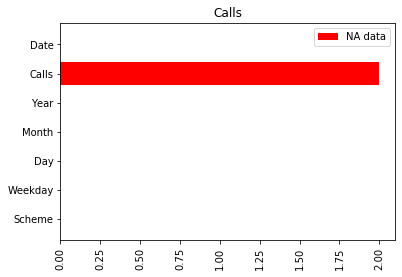

Result:

Total NA according to sheets: 
	Dictionary: 0 / 108
	Calls: 2 / 850129
	Quotes: 0 / 36992
	Sales: 0 / 139329
	Model Data: 0 / 1872

Total NA: 2 / 1028430


In [643]:
NA_check()

In [644]:
dfc = data["Calls"]
dfc[dfc["Calls"].isna() == True]

,Scheme,Weekday,Day,Month,Year,Calls,Date
99586,A93,Wed,24,7,2019,NaN,2019-07-24
108018,A93,Mon,19,8,2019,NaN,2019-08-19


# Section 1b: Analysing the quality of data
We can see that there are only 2 NaN datas. The rest of the data seems fine. So, the data quality seems to be good. 
Looking below, we can also see that all the datatypes seems to be reasonable. That means, the datatypes are very particular, objects only for Channel, Scheme, Weekday. The dates seem to be in datetime datatype. Rest are either integer or float. Overall, the data is cleaned and good for processing.

In [645]:
for k in data.keys():
    if k  == "Brief":
        continue
    print(k)
    print(data[k].dtypes)
    print()

Dictionary
Channel    object
Scheme     object
dtype: object

Calls
Scheme             object
Weekday            object
Day                 int64
Month               int64
Year                int64
Calls             float64
Date       datetime64[ns]
dtype: object

Quotes
Date            datetime64[ns]
Scheme                  object
Sales Quotes             int64
Spend                  float64
dtype: object

Sales
Date      datetime64[ns]
Scheme            object
Sales              int64
dtype: object

Model Data
Date                           datetime64[ns]
Conversions                           float64
TV Brand Impacts                      float64
TV Impacts                            float64
Facebook Impressions                  float64
Door Drop Volumes                     float64
Insert Volumes                        float64
Video On Demand Impressions           float64
Display Impressions                   float64
2020 Flag                               int64
Bank Holiday flag     

# Section 1c : Grouping Sales, Quotes and Calls tables into one table

In [646]:
first_outer_join = pd.merge(data['Sales'],data['Quotes'], on=('Date','Scheme'), how="outer")
outer_join = pd.merge(first_outer_join,data['Calls'], on=['Date','Scheme'], how="outer")
outer_join


,Date,Scheme,Sales,Sales Quotes,Spend,Weekday,Day,Month,Year,Calls
0,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0
1,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0
2,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0
3,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0
4,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2800796,2019-10-10,U04,NaN,NaN,NaN,Thu,10.0,10.0,2019.0,1.0
2800797,2019-10-10,NBJ,NaN,NaN,NaN,Thu,10.0,10.0,2019.0,1.0
2800798,2019-10-10,A93,NaN,NaN,NaN,Thu,10.0,10.0,2019.0,1.0
2800799,2019-10-10,SFF,NaN,NaN,NaN,Thu,10.0,10.0,2019.0,1.0


# Section 1d : Creating Channel Column usinf Scheme code and dictionary

In [647]:
channel_join = pd.merge(outer_join,data['Dictionary'], on='Scheme', how="outer")
channel_join

,Date,Scheme,Sales,Sales Quotes,Spend,Weekday,Day,Month,Year,Calls,Channel
0,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0,Website
1,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0,Website
2,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0,Website
3,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0,Website
4,2018-01-02,CHD,1.0,NaN,NaN,Tue,2.0,1.0,2018.0,1.0,Website
...,...,...,...,...,...,...,...,...,...,...,...
2800796,2019-08-22,E45,NaN,NaN,NaN,Thu,22.0,8.0,2019.0,1.0,Inserts
2800797,2019-08-26,E45,NaN,NaN,NaN,Mon,26.0,8.0,2019.0,1.0,Inserts
2800798,2019-08-27,E45,NaN,NaN,NaN,Tue,27.0,8.0,2019.0,1.0,Inserts
2800799,2019-08-28,E45,NaN,NaN,NaN,Wed,28.0,8.0,2019.0,1.0,Inserts


In [648]:
channel_join.isna().sum()

Date                  0
Scheme                0
Sales             23746
Sales Quotes    1411258
Spend           1411258
Weekday             929
Day                 929
Month               929
Year                929
Calls               931
Channel               0
dtype: int64

In [649]:
channel_join[channel_join['Weekday'].isna() == True]
#len(channel_join['Channel'].unique())

,Date,Scheme,Sales,Sales Quotes,Spend,Weekday,Day,Month,Year,Calls,Channel
1785859,2018-01-16,DSS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renewal Comms
1785989,2018-02-13,DSS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renewal Comms
1785990,2018-02-13,DSS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renewal Comms
1786032,2018-03-19,DSS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renewal Comms
1786033,2018-03-19,DSS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renewal Comms
...,...,...,...,...,...,...,...,...,...,...,...
2800752,2019-08-12,U2U,NaN,1.0,142.8115,NaN,NaN,NaN,NaN,NaN,Renewal Comms
2800753,2019-08-15,U2U,NaN,1.0,511.4163,NaN,NaN,NaN,NaN,NaN,Renewal Comms
2800756,2019-04-29,SQF,NaN,1.0,178.3080,NaN,NaN,NaN,NaN,NaN,Renewal Comms
2800761,2019-08-05,E46,NaN,1.0,51.7779,NaN,NaN,NaN,NaN,NaN,Inserts


## Analysis
Looking at the massive amounts of NaNs, we can see that its bad. But since, we are joining the tables, we can only do outer join to stop losing any data.

# Section 1e : The Avg quotes to Websites in 2018 and 2019

In [650]:
dfw = channel_join[channel_join['Channel']=="Website"]
mean2018 = dfw[dfw["Year"]==2018]['Sales Quotes'].mean()
mean2019 = dfw[dfw["Year"]==2019]['Sales Quotes'].mean()
print("Average quotes in 2018 is",mean2018)
print("Average quotes in 2019 is",mean2019)

Average quotes in 2018 is 10.399324166860872
Average quotes in 2019 is 11.769763878158152


In [651]:
percentage = (mean2019 - mean2018)/mean2018 * 100
print("Percentage increase of quotes from 2018 to 2019 is %d%%."%percentage)

Percentage increase of quotes from 2018 to 2019 is 13%.


# Section 1f : Grouping Data at weekly level

In [652]:
dfDM = channel_join.copy()
dfDM = dfDM.groupby(['Channel', pd.Grouper(key='Date', freq='W-MON')])['Sales'].sum().reset_index().sort_values('Date')
dfDM['Sales'].sum()
dfDM

,Channel,Date,Sales
578,Renewal Comms,2018-01-08,14.0
883,Website,2018-01-08,14625.0
220,Newspapers,2018-01-08,129.0
790,TV,2018-01-08,38.0
313,Other,2018-01-08,2.0
...,...,...,...
577,PPC Generic,2019-10-14,0.0
666,Renewal Comms,2019-10-14,0.0
714,SEO,2019-10-14,0.0
85,DM,2019-10-14,0.0


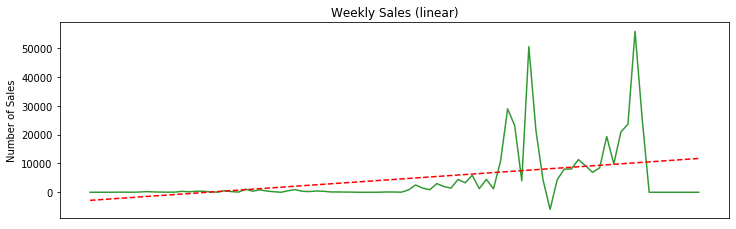

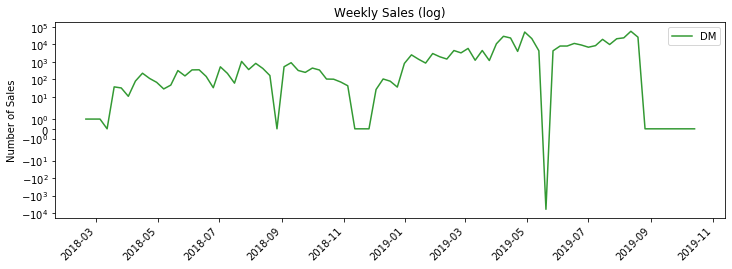

In [653]:
for t in ['linear','symlog']:
    tempdf = dfDM[dfDM['Channel'] == 'DM']
    x = tempdf.iloc[:,1]
    if t == 'linear':
        x = tempdf.iloc[:,1].apply(mpl_dates.date2num).astype(float)
    y = tempdf.iloc[:,2]
    
    #plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    
    plt.figure(figsize=(12,4))
    plt.plot(x,y,alpha=0.8,color='g')
    plt.gcf().autofmt_xdate()
    plt.xticks(rotation = 45)
    plt.title("Weekly Sales (log)")
    plt.yscale(t)
    plt.ylabel('Number of Sales')
    if t == 'linear':
        plt.title("Weekly Sales (linear)")
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x,p(x),"r--")
        plt.xticks([])
    
plt.legend(['DM'])
plt.show()


# Section 2

## Understanding 'Model Data'

In [654]:
print(data['Model Data'].dtypes)
data['Model Data'].head()

Date                           datetime64[ns]
Conversions                           float64
TV Brand Impacts                      float64
TV Impacts                            float64
Facebook Impressions                  float64
Door Drop Volumes                     float64
Insert Volumes                        float64
Video On Demand Impressions           float64
Display Impressions                   float64
2020 Flag                               int64
Bank Holiday flag                       int64
Christmas Flag                          int64
dtype: object


,Date,Conversions,TV Brand Impacts,TV Impacts,Facebook Impressions,Door Drop Volumes,Insert Volumes,Video On Demand Impressions,Display Impressions,2020 Flag,Bank Holiday flag,Christmas Flag
0,2018-02-05,73.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,2018-02-12,67.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,2018-02-19,79.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,2018-02-26,76.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,2018-03-05,45.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


# Section 2a : Co-relation heatmap between channels

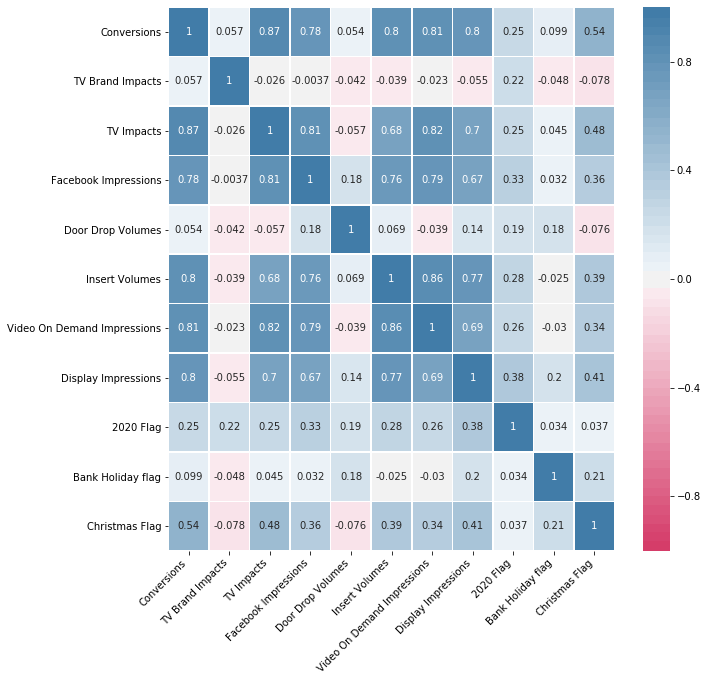

In [655]:
corr = data['Model Data'].iloc[:,1:].corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 600, n=60),
    square=False,
    linewidth = 0.5,
    annot = True
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Section 2b: Building regression model to get channel contributions

## Building model and printing MAE

In [656]:
#print(data['Model Data'].isna().sum())
X = data['Model Data'].iloc[:,2:].astype(float) 
y = data['Model Data'].iloc[:,1].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [657]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_pred,y_test)


### Using Statsmodel 

In [658]:
# X = sm.add_constant(X)
# model = sm.OLS(y,X).fit()
# print(model.summary())
# print(X_test.shape, y_test.shape)
# predictions = model.predict(X)
# print(predictions.sum())
# mean_absolute_error(predictions,y)

## Getting Coefficient of linear equation and its intercept

In [659]:
coefficient = lr.coef_
intercept = lr.intercept_
print("Coefficient",coefficient,end="\n\n",sep="\n")
print("Intercept",intercept,sep="\n")

Coefficient
[ 1.02058860e-05  2.50829086e-05  1.93468387e-04  6.15399319e-06
  3.47370182e-04 -3.75632690e-04  9.13989517e-04 -4.74049879e+01
  2.69194651e+01  2.92105191e+01]

Intercept
81.33609607095181


## Data Obtained

In [660]:
sumData = data['Model Data'].iloc[:,1:].sum()
y_predict = intercept
conversion_list = []
print("Number of Conversion by : ")
for i in range(1,len(sumData)):
    contri = sumData[i]*coefficient[i-1]*1.954
    conversion_list.append(contri)
    print("%s : %d"%(sumData.index[i],contri))
    y_predict += contri

Number of Conversion by : 
TV Brand Impacts : 1863
TV Impacts : 20956
Facebook Impressions : 1518
Door Drop Volumes : 745
Insert Volumes : 8022
Video On Demand Impressions : -7638
Display Impressions : 4076
2020 Flag : -4909
Bank Holiday flag : 1104
Christmas Flag : 1027


## Graph from Output

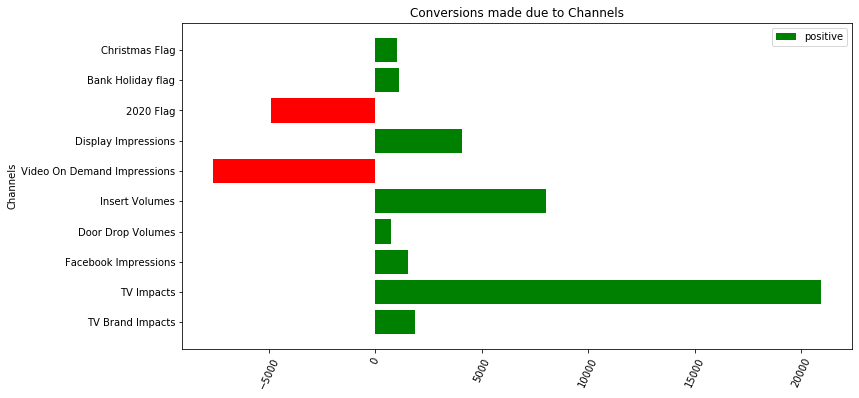

In [661]:
# print(len(conversion_list),conversion_list)
# print(len(sumData.index[1:]),sumData.index)
plt.figure(figsize = (12,6))
colorlist = ['r' if x < 0 else 'g' for x in conversion_list]
plt.barh(sumData.index[1:],conversion_list,color= colorlist)
plt.xticks(rotation = 65)
plt.legend(['positive'])
plt.ylabel("Channels")
plt.title('Conversions made due to Channels')
plt.show()

# Section 2c: Key Summary

In [662]:
print("Coefficient :\n",coefficient)
print("Intercept :",intercept)
print("Mean Absolute Error :",mae)
print("Squared R : ",lr.score(X,y))

Coefficient :
 [ 1.02058860e-05  2.50829086e-05  1.93468387e-04  6.15399319e-06
  3.47370182e-04 -3.75632690e-04  9.13989517e-04 -4.74049879e+01
  2.69194651e+01  2.92105191e+01]
Intercept : 81.33609607095181
Mean Absolute Error : 77.90611007198059
Squared R :  0.855351938309668


## Analysis:
The R-squared value is 0.85. It’s a high value which means the regression plane fits quite well with the real data points, and majority of the variables are around the gradient. 
The MAE is also relatively low (77). Overall, it is a good model. Looking at the graph, we can see that "TV Impacts" created highest conversions, followed by "Insert Volumes" and "Display Impression". 
We can see that "Video On Demand Impression" and "2020 Flag" might have produced a counteractive result. This might occur because of colinearity. We will further discuss it below. This is one of the reason why multivariate regression is preferred in business world.

# Section 2d: Caveats and Consideration

While doing linear regression, we assume that every predictor variables are independent. But, we can see the negative result in the graph for "Video On Demand Impression" and "2020 Flag" despite the postive correlation shown in the earlier heatmap. It occured because of the existing high correlation between the channels (predictor variables) themselves. It means that the regression coefficients are not unique and independent. 

# Section 2e:

We can analyse that most of the consumers watch TVs. Investing more in the TV ads seems reasonable. We can also see that social media are not very effective for this group of customers.Social medias shouldn't have much investment. The funding towards "videos on demand" and "2020 flag" needs to decrease significantly. 
In summary,the client should invest more in the channels that have high sales, keep investment for the ones with postive sales and either stop or significantly decrease funding towards the channels causing negative growth.
### The methodologies such as 
#### Hypothesis Testing (T-testing),
can be used before investing on channels. 
#### Monto Carlo simulation
can be used to calculate the risk behind channels.
### The sources to get data are:
#### POS-Point of Sales. 
You need to track all your transactions.
#### Ecommerce transactional Data.
for online sales.
#### In-store sensor data.
get info from in-store movement of clients, dwell time, customer wifi usage time, in-store foot traffic etc.
#### Social medias
to understand customer expectations and satisfaction. It can be used to predict customer stickiness.
### Things to Note
#### customer analysis
to understand how to increase customer stickiness
#### predicting needs
to understand what product is essential to which area
#### price optimization
to make displayed price slight less than competitors
#### inventory analysis
to understand what products are not sold properly, and eliminate them
#### display analysis
to understand what to display at shops to increase traffic